## Twitter Sentiment analysis

### Problem Statement
To classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

### Importing Libraries and Data 

In [40]:
import numpy as np
import pandas as pd
import requests

In [41]:
train_df=pd.read_csv("train_E6oV3lV.csv")
test_df=pd.read_csv("test_tweets_anuFYb8.csv")

In [42]:
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [43]:
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [44]:
both=train_df.append(test_df, ignore_index=True)
both.shape

(49159, 3)

In [45]:
both.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


### Text Processing

#### Removing patterns or any special characters from the review section

In [46]:
both['tweet_clean']=both['tweet'].str.replace("[^a-zA-Z#]"," ")
both.head()

,id,label,tweet,tweet_clean
0,1,0.0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i can t us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [47]:
#Converting all the text into lower
both['tweet_clean']=both['tweet_clean'].apply(lambda x: x.lower())
both.head()

,id,label,tweet,tweet_clean
0,1,0.0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i can t us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


#### Removing stopwords 

In [48]:
#Removing stopwords
from nltk.corpus import stopwords
review=both['tweet_clean'].apply(lambda x: x.split())
print(review)

0        [user, when, a, father, is, dysfunctional, and...
1        [user, user, thanks, for, #lyft, credit, i, ca...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide, society, now, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, a, mermaid, #hairflip, #neverr...
49156    [#hillary, #campaigned, today, in, #ohio, omg,...
49157    [happy, at, work, conference, right, mindset, ...
49158    [my, song, so, glad, free, download, #shoegaze...
Name: tweet_clean, Length: 49159, dtype: object


In [49]:
stop_words=stopwords.words('english')
review=review.apply(lambda x: [word for word in x if word not in stop_words])
#review = [word for word in review if word not in stopwords.words('english')]
print(review.head())

0    [user, father, dysfunctional, selfish, drags, ...
1    [user, user, thanks, #lyft, credit, use, cause...
2                                    [bihday, majesty]
3                 [#model, love, u, take, u, time, ur]
4                   [factsguide, society, #motivation]
Name: tweet_clean, dtype: object


#### Text Normalization

In [50]:
#Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
review=review.apply(lambda x: [stemmer.stem(i) for i in x])
review.head()

0    [user, father, dysfunct, selfish, drag, kid, d...
1    [user, user, thank, #lyft, credit, use, caus, ...
2                                    [bihday, majesti]
3                 [#model, love, u, take, u, time, ur]
4                         [factsguid, societi, #motiv]
Name: tweet_clean, dtype: object

In [51]:
for i in range(len(review)):
    review[i]=' '.join(review[i])
    
both['tweet_clean']=review

In [52]:
both.head()

,id,label,tweet,tweet_clean
0,1,0.0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,user user thank #lyft credit use caus offer wh...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#### Visualization
Undersatnding the common words used in tweets using WordCloud

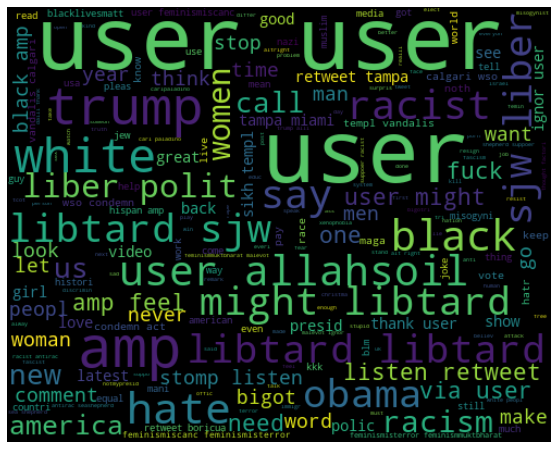

In [53]:
word_join_1=' '.join([x for x in both['tweet_clean'][both['label']==1]])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(width=500, height=400, random_state=42, max_font_size=80).generate(word_join_1)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

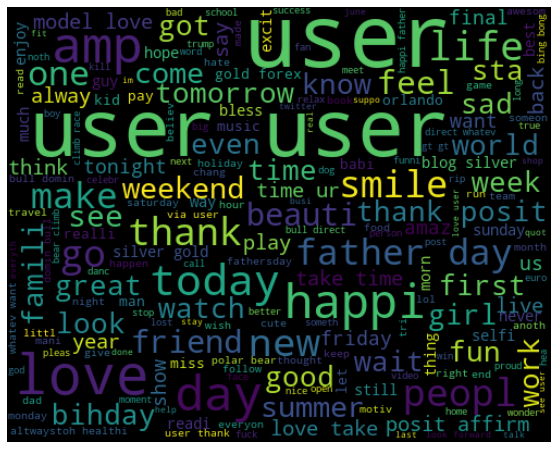

In [54]:
word_join_0=' '.join([x for x in both['tweet_clean'][both['label']==0]])
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(width=500, height=400, random_state=42, max_font_size=80).generate(word_join_0)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Extracting Features

#### Word2Vec Embedding

In [55]:
tweet_token=both['tweet_clean'].apply(lambda x: x.split())

In [56]:
import nltk
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [57]:
model=Word2Vec(tweet_token,size=200, min_count=2, window=5, sg=1, negative=10, workers=2, seed=40)

In [58]:
model.train(tweet_token, total_examples=len(both['tweet_clean']), epochs=20)

(6857355, 8201600)

In [59]:
model.wv.most_similar(positive="dinner")

[('crockpot', 0.5717302560806274),
 ('burrito', 0.5669002532958984),
 ('spaghetti', 0.5631970167160034),
 ('#foodcoma', 0.56003338098526),
 ('cookout', 0.553076982498169),
 ('#burrito', 0.5326911807060242),
 ('lukey', 0.5323824286460876),
 ('#biall', 0.528540849685669),
 ('enrout', 0.5248088836669922),
 ('superb', 0.5217670202255249)]

In [60]:
model['food']

C:\Users\Apurva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.11745916,  0.36300266, -0.03410644,  0.2990845 , -0.38338006,
        0.92420846,  0.27789912,  1.0748087 , -0.2657704 , -0.6726421 ,
       -0.2940207 ,  0.75716233, -0.19449702,  0.33441195, -0.14750421,
       -0.34746754, -0.20493981,  0.1741685 , -0.22660562,  0.18166189,
        0.82169193,  0.13918893,  0.72192574, -0.21944943,  0.31186324,
       -0.07173436,  0.6514269 ,  0.15768431, -0.00172771, -0.07323639,
        0.3626108 , -0.947187  ,  0.14838217,  0.5253297 ,  0.37589505,
       -0.662311  , -0.46327713,  0.2030228 ,  0.3560507 , -0.3713295 ,
        0.6682124 ,  0.20206998, -0.26366922, -0.3140883 ,  0.94755864,
        0.87550646, -0.5340583 ,  0.05011389,  0.25602064, -0.1618779 ,
       -0.14779009,  0.1543468 ,  0.62372947, -0.33740628,  0.6949403 ,
       -0.1839811 , -0.84863335,  0.15405984,  0.14619112,  0.70873404,
        0.45465904,  0.01796445, -0.00757152, -0.54195863,  0.2215729 ,
        0.08290791, -0.27578345,  0.6809376 ,  0.06984113, -0.27

Preparing vectors for for tweets

In [61]:
def sent_vec_w2v(sent):
    wv_res = np.zeros(model.vector_size)
    ctr = 1
    for w in sent:
        if w in model:
            ctr += 1
            wv_res += model[w]
    wv_res = wv_res/ctr
    return wv_res

In [62]:
#Preparing feature set
wordvec_arrays = np.zeros((len(tweet_token), 200))

for i in range(len(tweet_token)):
    wordvec_arrays[i,:] = sent_vec_w2v(tweet_token[i])
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

C:\Users\Apurva\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
C:\Users\Apurva\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(49159, 200)

In [63]:
train=wordvec_df.iloc[:31962,:]
test=wordvec_df.iloc[31962:,:]

### Model Building 

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [65]:
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(train_df)
print(kf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


#### XG Boost  

In [66]:
import xgboost as xgb

In [67]:
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(train.values,train_df.label.values):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = train_df.label.values[train_index], train_df.label.values[test_index]

In [68]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dval=xgb.DMatrix(X_test,label=y_test)
dtest=xgb.DMatrix(np.array(test))

In [69]:
params={
    'max_depth':6,
    'objective':'binary:logistic',
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'min_child_weight': 1
}

In [70]:
model=xgb.train(params, dtrain, 500, maximize=True, verbose_eval=15)

In [71]:
pred=model.predict(dtest)

In [72]:
test_df['label']=pred

In [73]:
test_df.to_csv("submission1.csv")

Public Leaderboard F1-Score:0.7347